# Text mining on iphone 11 amazon review dataset

# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re
import string
%matplotlib inline

### Importing the dataset

In [3]:
reviews = pd.read_csv("reviews.csv")
reviews.head()

,id,profileName,text,date,title,rating,images,helpful,Size name,Colour,Pattern name
0,R2175DKWOQ16BI,Neha,\n Please do not buy expensive product like i...,Reviewed in India on 10 July 2020,Do not buy iphone or expensive product from Am...,1,https://images-na.ssl-images-amazon.com/images...,18424,NaN,NaN,NaN
1,R2P0NP0OWNJQFU,Krusshna,\n Bought the mobile from appario retail ltd....,Reviewed in India on 13 November 2019,Don’t buy it from this seller,1,https://images-na.ssl-images-amazon.com/images...,5328,NaN,NaN,NaN
2,R2XPHII12D9O7Q,shanu Kumar,\n Awesome Phone. Nice upgrade from iPhone 6s...,Reviewed in India on 30 September 2019,Solid premium phone from Apple,5,https://images-na.ssl-images-amazon.com/images...,2881,NaN,NaN,NaN
3,R30BO9XB4936RU,Sai,\n This is a big scam. I received the iphone ...,Reviewed in India on 22 July 2020,GOT CHEATED . ITS A SCAM. AMAZON FIX THIS,1,NaN,1279,NaN,NaN,NaN
4,R24K8G1ABRUZHM,Amazon Customer,\n My Phone is Producing Too Much Heat Even D...,Reviewed in India on 14 October 2019,Worst Experience Ever.!,1,NaN,1422,NaN,NaN,NaN


In [6]:
review=reviews["title"]
review.head()

0    Do not buy iphone or expensive product from Am...
1                        Don’t buy it from this seller
2                       Solid premium phone from Apple
3            GOT CHEATED . ITS A SCAM. AMAZON FIX THIS
4                              Worst Experience Ever.!
Name: title, dtype: object

In [7]:
review.shape

(1000,)

In [8]:
text="".join(review)

In [9]:
text

'Do not buy iphone or expensive product from AmazomDon’t buy it from this sellerSolid premium phone from AppleGOT CHEATED . ITS A SCAM. AMAZON FIX THISWorst Experience Ever.!First Time iPhone User Review :-)iPhone 11Defective Iphone 11Too much heat on normal useProvided with a defective productnot a good productDont rush to buy and waste your moneyBest iPhone ever | Super Night Mode | Super Camera | YellowHeating issueBlack spot found on the new phone.Samsung s10 is better than iphoneDefective modeliPhone XR with better Camera and InternalsNot good productNot recommendedLook likes Chinese mobile phone {waste of my hardships}Don\'t buy from AmazonBad quality productDon\'t buy from Appario ResellerMinor damage to the productiPhone 11 already opened/usedThe feel of it!IT’S A TRAPTerrific purchase: iPhone 11 White 128GBDefective handset iPhone 11worst product worst serviceWith a new design and good featuresAbsolutely LOVE it !!!Lack of customer loyalty and too many faulty devicesAwesome pr

In [10]:
text = re.sub("[^A-Za-z" "]+"," ",text).lower()
text =re.sub("[0-9" "]+"," ",text)

In [11]:
text_words = text.split(" ")

In [12]:
text_words

['do',
 'not',
 'buy',
 'iphone',
 'or',
 'expensive',
 'product',
 'from',
 'amazomdon',
 't',
 'buy',
 'it',
 'from',
 'this',
 'sellersolid',
 'premium',
 'phone',
 'from',
 'applegot',
 'cheated',
 'its',
 'a',
 'scam',
 'amazon',
 'fix',
 'thisworst',
 'experience',
 'ever',
 'first',
 'time',
 'iphone',
 'user',
 'review',
 'iphone',
 'defective',
 'iphone',
 'too',
 'much',
 'heat',
 'on',
 'normal',
 'useprovided',
 'with',
 'a',
 'defective',
 'productnot',
 'a',
 'good',
 'productdont',
 'rush',
 'to',
 'buy',
 'and',
 'waste',
 'your',
 'moneybest',
 'iphone',
 'ever',
 'super',
 'night',
 'mode',
 'super',
 'camera',
 'yellowheating',
 'issueblack',
 'spot',
 'found',
 'on',
 'the',
 'new',
 'phone',
 'samsung',
 's',
 'is',
 'better',
 'than',
 'iphonedefective',
 'modeliphone',
 'xr',
 'with',
 'better',
 'camera',
 'and',
 'internalsnot',
 'good',
 'productnot',
 'recommendedlook',
 'likes',
 'chinese',
 'mobile',
 'phone',
 'waste',
 'of',
 'my',
 'hardships',
 'don',
 

In [13]:
textw=" ".join(text_words)

In [14]:
textw

'do not buy iphone or expensive product from amazomdon t buy it from this sellersolid premium phone from applegot cheated its a scam amazon fix thisworst experience ever first time iphone user review iphone defective iphone too much heat on normal useprovided with a defective productnot a good productdont rush to buy and waste your moneybest iphone ever super night mode super camera yellowheating issueblack spot found on the new phone samsung s is better than iphonedefective modeliphone xr with better camera and internalsnot good productnot recommendedlook likes chinese mobile phone waste of my hardships don t buy from amazonbad quality productdon t buy from appario resellerminor damage to the productiphone already opened usedthe feel of it it s a trapterrific purchase iphone white gbdefective handset iphone worst product worst servicewith a new design and good featuresabsolutely love it lack of customer loyalty and too many faulty devicesawesome product great pricei phone good product

# TOKENIZATION

In [15]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(textw)
print(text_tokens[0:50])

['do', 'not', 'buy', 'iphone', 'or', 'expensive', 'product', 'from', 'amazomdon', 't', 'buy', 'it', 'from', 'this', 'sellersolid', 'premium', 'phone', 'from', 'applegot', 'cheated', 'its', 'a', 'scam', 'amazon', 'fix', 'thisworst', 'experience', 'ever', 'first', 'time', 'iphone', 'user', 'review', 'iphone', 'defective', 'iphone', 'too', 'much', 'heat', 'on', 'normal', 'useprovided', 'with', 'a', 'defective', 'productnot', 'a', 'good', 'productdont', 'rush']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
len(text_tokens)

4498

# Remove stopwords

In [17]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['buy', 'iphone', 'expensive', 'product', 'amazomdon', 'buy', 'sellersolid', 'premium', 'phone', 'applegot', 'cheated', 'scam', 'amazon', 'fix', 'thisworst', 'experience', 'ever', 'first', 'time', 'iphone', 'user', 'review', 'iphone', 'defective', 'iphone', 'much', 'heat', 'normal', 'useprovided', 'defective', 'productnot', 'good', 'productdont', 'rush', 'buy', 'waste', 'moneybest', 'iphone', 'ever', 'super']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Normalize the data

In [18]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['buy', 'iphone', 'expensive', 'product', 'amazomdon', 'buy', 'sellersolid', 'premium', 'phone', 'applegot', 'cheated', 'scam', 'amazon', 'fix', 'thisworst', 'experience', 'ever', 'first', 'time', 'iphone', 'user', 'review', 'iphone', 'defective', 'iphone']


# Stemming

In [19]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['buy', 'iphon', 'expens', 'product', 'amazomdon', 'buy', 'sellersolid', 'premium', 'phone', 'applegot', 'cheat', 'scam', 'amazon', 'fix', 'thisworst', 'experi', 'ever', 'first', 'time', 'iphon', 'user', 'review', 'iphon', 'defect', 'iphon', 'much', 'heat', 'normal', 'useprovid', 'defect', 'productnot', 'good', 'productdont', 'rush', 'buy', 'wast', 'moneybest', 'iphon', 'ever', 'super']


In [20]:
len(stemmed_tokens)

2999

# Loading the nlp spacy library

In [21]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

# Lemmatization

In [22]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

buy iphone expensive product amazomdon buy sellersolid premium phone applegot cheated scam amazon fix thisworst experience ever first time iphone user review iphone defective iphone much heat normal useprovided defective productnot good productdont rush buy waste moneybest iphone ever super


In [23]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['buy', 'iphone', 'expensive', 'product', 'amazomdon', 'buy', 'sellersolid', 'premium', 'phone', 'applegot', 'cheat', 'scam', 'amazon', 'fix', 'thisworst', 'experience', 'ever', 'first', 'time', 'iphone', 'user', 'review', 'iphone', 'defective', 'iphone']


In [24]:
len(lemmas)

3006

# Feature extraction

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [26]:
print(vectorizer.vocabulary_)

{'buy': 174, 'iphone': 578, 'expensive': 402, 'product': 921, 'amazomdon': 26, 'sellersolid': 1084, 'premium': 894, 'phone': 842, 'applegot': 78, 'cheat': 217, 'scam': 1056, 'amazon': 27, 'fix': 443, 'thisworst': 1186, 'experience': 403, 'ever': 380, 'first': 442, 'time': 1190, 'user': 1235, 'review': 1022, 'defective': 289, 'much': 743, 'heat': 521, 'normal': 769, 'useprovided': 1234, 'productnot': 940, 'good': 486, 'productdont': 931, 'rush': 1040, 'waste': 1259, 'moneybest': 726, 'sup': 1160, 'night': 765, 'mode': 716, 'super': 1161, 'camera': 195, 'yellowheating': 1298, 'issueblack': 613, 'spot': 1142, 'find': 439, 'new': 760, 'samsung': 1049, 'well': 1269, 'iphonedefective': 589, 'modeliphone': 718, 'xr': 1294, 'better': 144, 'internalsnot': 565, 'recommendedlook': 1003, 'like': 661, 'chinese': 220, 'mobile': 712, 'hardship': 515, 'amazonbad': 31, 'quality': 973, 'productdon': 930, 'appario': 70, 'resellerminor': 1014, 'damage': 264, 'productiphone': 937, 'already': 19, 'open': 79

In [27]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['amazonthe', 'amazonthese', 'amazonurgent', 'amazonworst', 'amazonworth', 'amoledgot', 'amount', 'amzonworst', 'anavasaramdisplay', 'andriod', 'android', 'androidappario', 'androidawesome', 'androidchina', 'androidit', 'androidnew', 'androidthink', 'anything', 'anywhere', 'apario', 'appario', 'apple', 'appleamazingly', 'applebuying', 'applecomplete', 'appledon', 'appledont', 'applegenuine', 'applegot', 'appleiphone', 'applenot', 'applereceive', 'appleworrie', 'appreciate', 'apprio', 'appul', 'arevery', 'asapandroid', 'ask', 'aspectsuperbgood', 'assemble', 'assesriesnot', 'authentic', 'authorise', 'available', 'average', 'averagedelivery', 'avoid', 'await', 'away']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(X.toarray().shape)

(3006, 1304)


## Let's see how can bigrams and trigrams can be included here

In [29]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(text_tokens)

In [30]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['about', 'after', 'all', 'amazing', 'amazon', 'an', 'and', 'android', 'apple', 'are', 'as', 'at', 'awesome', 'bad', 'battery', 'before', 'best', 'better', 'but', 'buy', 'by', 'camera', 'can', 'charger', 'deal', 'defective', 'delivery', 'device', 'do', 'don', 'ever', 'expensive', 'experience', 'fast', 'faulty', 'first', 'for', 'from', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'happy', 'have', 'heating', 'if', 'in', 'ios', 'iphone', 'is', 'issue', 'it', 'its', 'just', 'life', 'love', 'mobile', 'money', 'much', 'must', 'my', 'new', 'no', 'not', 'of', 'on', 'one', 'or', 'perfect', 'phone', 'premium', 'price', 'product', 'products', 'purchase', 'quality', 'read', 'received', 'review', 'seller', 'service', 'so', 'superb', 'than', 'that', 'the', 'this', 'time', 'to', 'value', 'very', 'was', 'with', 'worst', 'worth', 'you', 'your']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TFIDF Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(text_tokens)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['about', 'above', 'accessories', 'adapter', 'adaptor', 'after', 'all', 'allawesome', 'always', 'am', 'amazing', 'amazingiphone', 'amazon', 'amazonawesome', 'amazonbest', 'amazoniphone', 'amazonworth', 'amount', 'an', 'and', 'android', 'any', 'anything', 'appario', 'apple', 'appledon', 'appul', 'are', 'as', 'assembled', 'at', 'average', 'avoid', 'awaited', 'awesome', 'awesomeapple', 'back', 'bad', 'battery', 'batterysystem', 'bcoz', 'be', 'beast', 'beastmost', 'beastswitching', 'beat', 'beauty', 'because', 'before', 'below', 'best', 'bestworth', 'better', 'big', 'bionic', 'black', 'blowing', 'bonus', 'borginal', 'box', 'boxthanks', 'brand', 'brother', 'budget', 'but', 'buy', 'buying', 'buywaste', 'by', 'cam', 'camera', 'camerabest', 'cameraiphone', 'can', 'care', 'cash', 'cashback', 'chacha', 'charger', 'charging', 'chinese', 'class', 'clone', 'comeon', 'comparison', 'condition', 'consider', 'content', 'cost', 'costbest', 'costly', 'could', 'current', 'customer', 'damaged', 'day', 'day

# Generate wordcloud

In [32]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

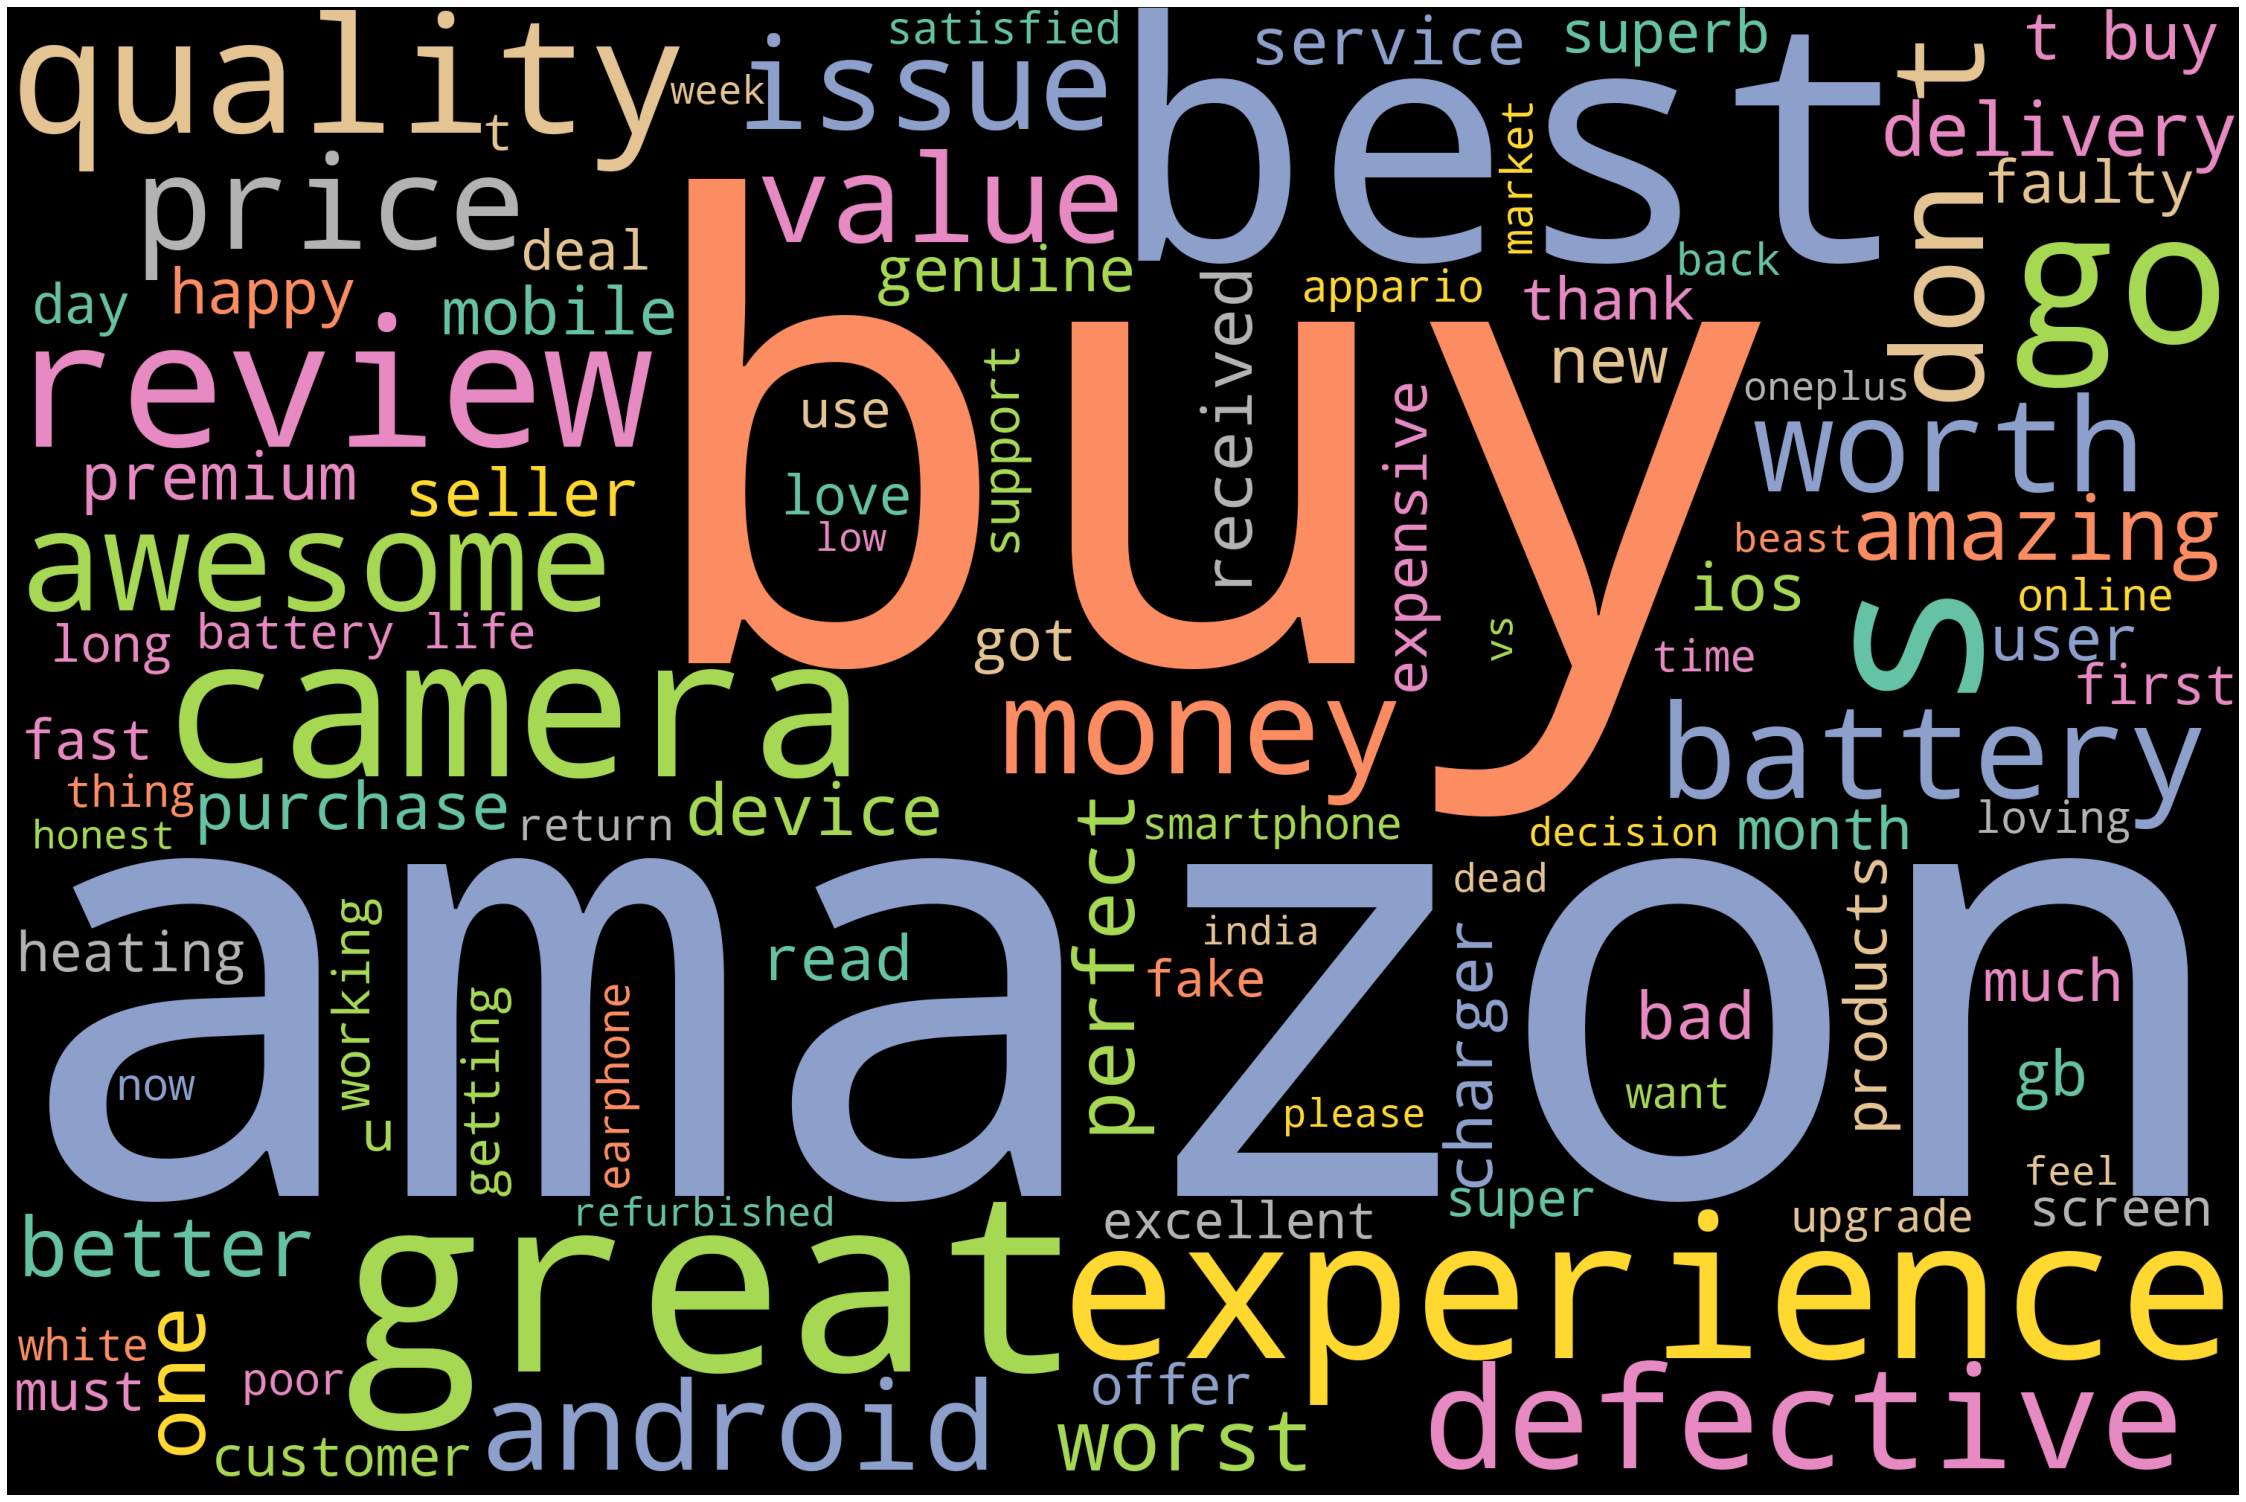

In [35]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('product')
stopwords.add('iphone')
stopwords.add('apple')
stopwords.add('phone')
stopwords.add('good')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Named Entity Recognition

In [37]:
##Part Of Speech Tagging
nlp = spacy.load('en')

one_block = text
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [38]:
for token in doc_block[0:20]:
    print(token, token.pos_)

do AUX
not PART
buy VERB
iphone NOUN
or CCONJ
expensive ADJ
product NOUN
from ADP
amazomdon PROPN
t PROPN
buy VERB
it PRON
from ADP
this DET
sellersolid ADJ
premium NOUN
phone NOUN
from ADP
applegot PROPN
cheated VERB


In [39]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['phone', 'cheated', 'scam', 'experience', 'time', 'heat', 'useprovided', 'productnot', 'productdont', 'rush', 'buy', 'waste', 'iphone', 'night', 'spot', 'found', 'phone', 'samsung', 'modeliphone', 'camera']


In [40]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,phone,116
1,product,66
2,buy,56
3,iphone,44
4,apple,31
5,experience,26
6,camera,25
7,go,24
8,battery,20
9,review,19


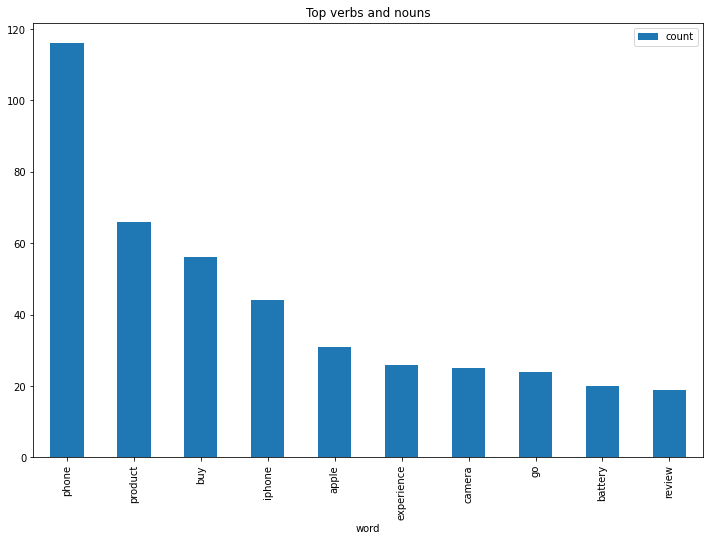

In [43]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# Emotion Mining

In [44]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [45]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [46]:
reviews1=pd.read_csv("reviews.csv")
reviews1.head()

,id,profileName,text,date,title,rating,images,helpful,Size name,Colour,Pattern name
0,R2175DKWOQ16BI,Neha,\n Please do not buy expensive product like i...,Reviewed in India on 10 July 2020,Do not buy iphone or expensive product from Am...,1,https://images-na.ssl-images-amazon.com/images...,18424,NaN,NaN,NaN
1,R2P0NP0OWNJQFU,Krusshna,\n Bought the mobile from appario retail ltd....,Reviewed in India on 13 November 2019,Don’t buy it from this seller,1,https://images-na.ssl-images-amazon.com/images...,5328,NaN,NaN,NaN
2,R2XPHII12D9O7Q,shanu Kumar,\n Awesome Phone. Nice upgrade from iPhone 6s...,Reviewed in India on 30 September 2019,Solid premium phone from Apple,5,https://images-na.ssl-images-amazon.com/images...,2881,NaN,NaN,NaN
3,R30BO9XB4936RU,Sai,\n This is a big scam. I received the iphone ...,Reviewed in India on 22 July 2020,GOT CHEATED . ITS A SCAM. AMAZON FIX THIS,1,NaN,1279,NaN,NaN,NaN
4,R24K8G1ABRUZHM,Amazon Customer,\n My Phone is Producing Too Much Heat Even D...,Reviewed in India on 14 October 2019,Worst Experience Ever.!,1,NaN,1422,NaN,NaN,NaN


In [47]:
review1=reviews1["title"]
review1.head()

0    Do not buy iphone or expensive product from Am...
1                        Don’t buy it from this seller
2                       Solid premium phone from Apple
3            GOT CHEATED . ITS A SCAM. AMAZON FIX THIS
4                              Worst Experience Ever.!
Name: title, dtype: object

In [48]:
from nltk import tokenize
sentences = tokenize.sent_tokenize("".join(review1))
sentences[5:15]

['!Great smartphone!',
 'Value for money!!',
 '& Premium feel!!',
 '!Received Defective, Screen Bleeding IssueDamaged Phone Supplied by AmazonBest thing that money can buyAverageOverall a great phone just not a perfect one.Trust In Amazon, INTACT !Beast with a limpPhone Awesome.',
 'Amazon Service Bad.Refurbished prodBAD EXPERIENCE WITH AMAZONThe best is here !iPhone 11 review after 3 months!Super ness HappinessSuperb phone...Premium in hand feelReceived a defective product and not able to return Or replace.',
 'Please do not buy online.Received Goodincrediable cameraiPhone 11 comparison any mobile Ram,PerformanceThe best decision of my lifeGreat battery+camera+Apple Quality!Honest review.',
 'Must read.New iPhone received today with dead battery!Best Buy iphone!defective  piece  OR a  faulty  product !',
 "!Unbiased Review after 1 month of UsageLuckily got a good phone!Happy with the product but not happy with the old phone exchange processCamera Quality is not good.Major issue with M

In [49]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Do not buy iphone or expensive product from Am...
1,ITS A SCAM.
2,AMAZON FIX THISWorst Experience Ever.
3,!First Time iPhone User Review :-)iPhone 11Def...
4,!Lack of customer loyalty and too many faulty ...
...,...
100,"So glad could find it here.Not users friendly,..."
101,!Best everBest phone at 48kAs expected it is n...
102,Go for it guys 😁Camera And Habit of Phone Usin...
103,Don’t have to sell your kidney 😉Thank u amazon...


In [50]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [51]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [52]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [53]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [54]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     20
1      3
2      5
3    110
4     32
5      2
6      3
7      3
8     30
9     32
Name: word_count, dtype: int64

In [55]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
87,Exciting Momentfake productIphone 11 128 gb re...,14,50
42,Do not ignore them because it sounds unreal an...,15,60
61,!A good phoneExperience the beauty..Awesome!I ...,15,73
37,"Read further to get the gistBest buy, Thanks t...",16,79
99,?Great product and safe deliveryGot this phone...,17,163
32,🍎The BEST ❤️Camera issue in iPhone100% Authent...,18,78
63,Go for it without a second thought.Worth to bu...,18,139
86,And good deliveryAwesomeJust moved to IOS from...,21,97
45,Read this completely and never get fooled.Grea...,21,99
60,best model in iphones.Awesome 👌Happy for it......,23,63


In [56]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    105.000000
mean       4.514286
std        6.222036
min       -6.000000
25%        0.000000
50%        3.000000
75%        7.000000
max       23.000000
Name: sentiment_value, dtype: float64

In [57]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Do not buy iphone or expensive product from Am...,-3,20
1,ITS A SCAM.,-2,3
2,AMAZON FIX THISWorst Experience Ever.,0,5
6,Value for money!!,0,3
7,& Premium feel!!,0,3


In [59]:
sent_df[sent_df['sentiment_value']>=20].head()

,sentence,sentiment_value,word_count
45,Read this completely and never get fooled.Grea...,21,99
60,best model in iphones.Awesome 👌Happy for it......,23,63
86,And good deliveryAwesomeJust moved to IOS from...,21,97


In [60]:
sent_df['index']=range(0,len(sent_df))

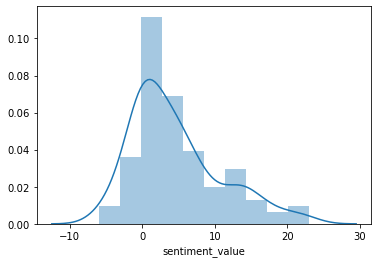

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

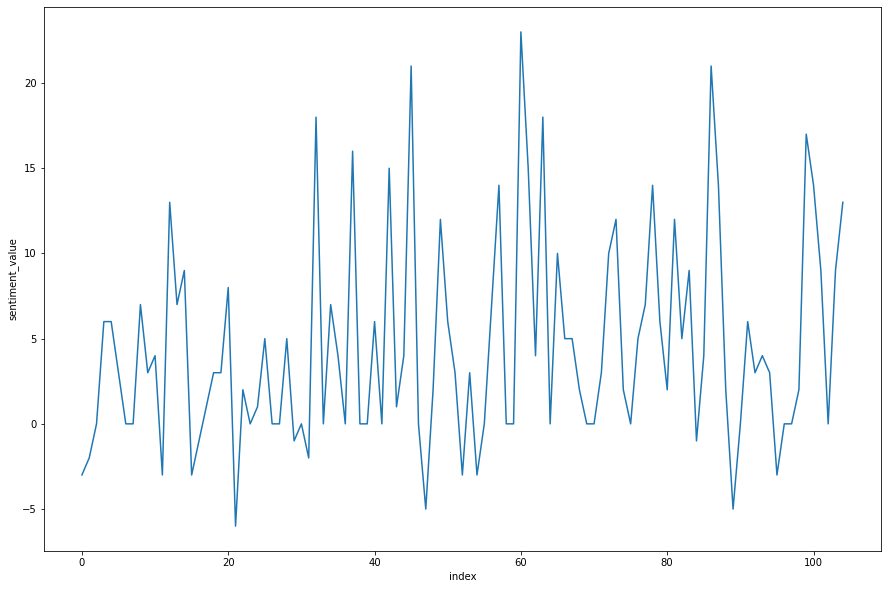

In [62]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

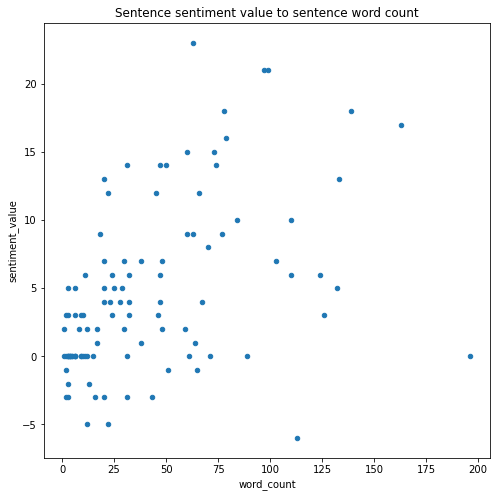

In [63]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# Conclusion:
##                     We performed text mining on Iphone 11 amazon review dataset,by tokenization,stemming,lemmatization,feature extraction,sentiment analysis and emotion mining.